# Analyzing 538's Star Wars Survey by Pavel Gladkevich
This project was completed as part of the Data Analyst series of Dataquest on 11/28/19

Goal: While waiting for the Star Wars movie, The Force Awakens, to come out the team at FiveThirtyEight became interested in answering questions about Star Wars fans. Namely they wondered if the rest of America realizes that “The Empire Strikes Back” is clearly the best of the bunch. To answer this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which we download from the [538 github repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response


In [579]:
import pandas as pd

# The encoding is not UTF-8, but ISO-8859-1, aka Latin-1 (useful for any Western European language)
star_wars = pd.read_csv("/Users/pgladkevich/Desktop/coding/projects/datasets/StarWars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

If a survey response in the column "Have you seen any of the 6 films in the Star Wars franchise?" was "No" the rest of the columns are logically "NaN" values. Additionally, the first row of values does not have a corresponding "RespondentID" so we can not use it for analysis as that will be our unique id. We will remove this row before proceeding.

In [580]:
# Use the pandas.notnull() function to create boolean mask on RespondentID and apply it to star_wars data frame
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

# Cleaning and Mapping Columns
Both of the following columns are yes/no questions that also contain NaN values if the responder chose not to answer them.
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?
We will convert them into boolean True, False, and leave the NaN values as is. To do this we will use the mapping function to map the existing values to their new values.

In [581]:
# Create a dictionary storing the transformation information.
yes_no = {
        "Yes" : True,
         "No" : False
}

# Create list of columns to iterate through
yes_no_col = ["Have you seen any of the 6 films in the Star Wars franchise?",
      "Do you consider yourself to be a fan of the Star Wars film franchise?"]

# Iterate through the list and map the old Yes No values to boolean analogs
for col in yes_no_col:
    star_wars[col] = star_wars[col].map(yes_no)

The columns following "Which of the following Star Wars films have you seen? Please select all that apply." are Unamed 4-8. Combined, these six columns are filled out with the respondent's answer to whether or not they've seen a particular Star Wars film from 1-6. In each of these columns the respondent's affirmative answer is the name of the movie, while a negative answer can be taken as either the lack of response or that the respondent hadn't seen the movie. We will map the positive responses to "True" and the "NaN" responses to "False".  

In [582]:
import numpy as np

# Create a dictionary storing the transformation information.    
movie_bool = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

# Iterate through the list and map the Movie Names and NaN values to boolean analogs
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_bool)

Lets also rename the columns to a more intuitive name such as seen_1 for if they respondent has seen The Phantom Menace and so on. 

In [583]:
# Rename the columns using the rename function and set the dataframe equal to the changes
star_wars = star_wars.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5", 
    "Unnamed: 8": "seen_6"
})

Lastly, we can clean the Ranking Columns which start with "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." and follow with Unnamed 10-14. Because the datatype of the columns is string we will need to convert it to numeric data first and then rename the columns names to something more intuitive.

In [584]:
# We can use the pandas dataframe and series function astype to convert the string values to floats
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename the names of the columns
star_wars = star_wars.rename(columns ={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

# Finding the Best Star Wars Movie by Different Metrics
Our dataset is now clean so we can try and find highest-ranked movie via vectorized pandas operations. To do this we will simply take the mean of each of the ranking columns and the column with the lowest mean value is the highest ranked. Then we will take the sum of the "seen" columns to figure out which movies have been seen by the most people. 

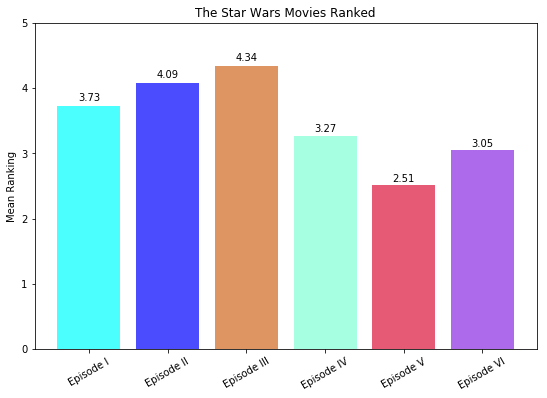

In [585]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create indices for shifting
ind = np.arange(6)
# Create a width for the bar
width = .5

# Create figure and ax objects
fig,ax = plt.subplots(figsize=(9,6))

# Calculate the mean of the Episode ranking columns and create a matplotlib barplot 
star_bplot = ax.bar(ind+width, star_wars[star_wars.columns[9:15]].mean(), color=["aqua","blue","chocolate","aquamarine","crimson","blueviolet"], alpha=.7)

# Ad labels to the graph and position the xticks for visibility 
ax.set_ylabel('Mean Ranking')
ax.set_title('The Star Wars Movies Ranked')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III','Episode IV', 'Episode V', 'Episode VI'), rotation = 30)
ax.set_ylim(0,5)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 1.01*height,
               '%.2f' % float(height), ha='center', va='bottom')
autolabel(star_bplot)

plt.show()

It appears the respondents ranked "Star Wars: Episode V The Empire Strikes Back" the highest out of any of the Star Wars movies by far. This supports our initial hypothesis that The Empire Strikes Back is the best of the Star Wars movies. Surprisingly, among the prequels the highest ranked movie was "Star Wars: Episode I The Phantom Menace." This is widely regarded as the worst movie amongst the prequels by both critics and fans on numerous Movie Rating sites such as [IMDB](https://www.imdb.com/title/tt0120915/), [Rotten Tomatoes](https://www.rottentomatoes.com/m/star_wars_episode_i_the_phantom_menace), and [Meta Critic](https://www.metacritic.com/movie/star-wars-episode-i---the-phantom-menace). Perhaps the survey results are not entirely aligned with the opinion of the general public; however, the results of the original trilogy do seem to extrapolate to the general population. The original trilogy is also much more highly ranked as a whole, which is in-line with the expectations. No we will observe the viewership results for the same categories. 

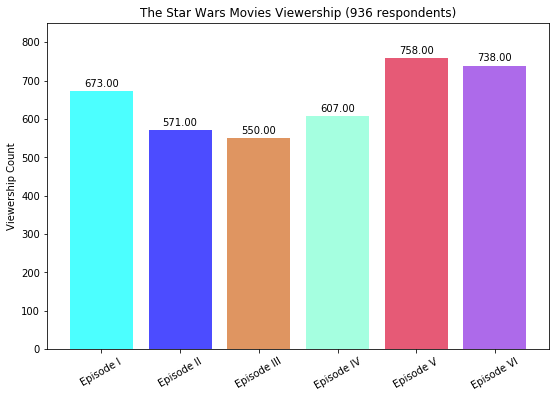

In [586]:
# Repeat the barplot creation with viewership sums
fig,ax = plt.subplots(figsize=(9,6))

stars_bplot = ax.bar(ind+width, star_wars[star_wars.columns[3:9]].sum(), color=["aqua","blue","chocolate","aquamarine","crimson","blueviolet"], alpha=.7)

# Ad labels to the graph and position the xticks for visibility 
ax.set_ylabel('Viewership Count')
ax.set_title('The Star Wars Movies Viewership (936 respondents)')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III','Episode IV', 'Episode V', 'Episode VI'), rotation = 30)
ax.set_ylim(0,850)

autolabel(stars_bplot)

plt.show()

It looks like the original trilogy has been seen by significantly more viewers than the prequels. Strangely, Episode IV has not been seen by as many viewers as the the following two episode from the original trilogy, eventhough it is the first in the series. Perhaps this is because Star Wars fans introduced their friends to the series by showing them Episode V, their favorite, and simply telling them what they missed from Episode IV. 

# Exploring the Data by Binary Segments
Now that we know as a whole how the survey responders ranked the movies lets explore the data to see if there are trends amongst groups within the respondents. We will explore the relationships in the following column:
- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
This question splits the data into a binary segment of respondents who are Star Wars fans, or respondents who are not. We will recreate the previous barplot to see if the rankings change amongst these two groups. 

In [587]:
# Split the data into respondents who are fans and not
fans = star_wars[star_wars.iloc[:,2]==True]
nonfans = star_wars[star_wars.iloc[:,2]==False]

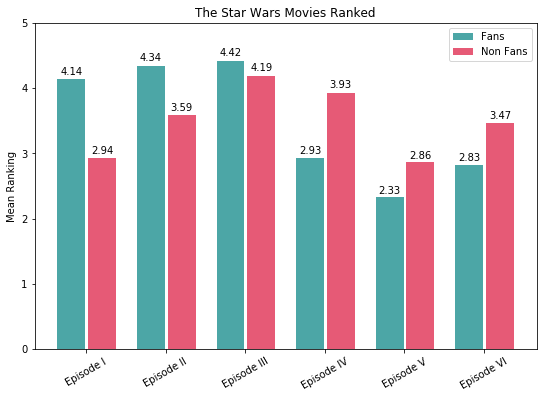

In [588]:
import numpy as np

# Create a new width and xtick position
x = np.arange(5)
width = .35

# Create figure and ax objects
fig,ax = plt.subplots(figsize=(9,6))

# Calculate the mean of the Episode ranking columns and create two matplotlib barplots 
fans_rank_bar = ax.bar(ind+width/2 -.01, fans[fans.columns[9:15]].mean(), width, color="teal", alpha=.7, label='Fans')
nonfans_rank_bar = ax.bar(ind+(width+.2), nonfans[nonfans.columns[9:15]].mean(), width, color="crimson", alpha=.7, label='Non Fans')

autolabel(fans_rank_bar)
autolabel(nonfans_rank_bar)

# Ad labels to the graph and position the xticks for visibility 
ax.set_ylabel('Mean Ranking')
ax.set_title('The Star Wars Movies Ranked')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III','Episode IV', 'Episode V', 'Episode VI'), rotation = 30)
ax.legend()

_=ax.set_ylim(0,5)

We can tell from the above barplot that the fans of the Star Wars franchise rank the original trilogy much higher across the board than non-fans. Conversely, they rank the prequel trilogy much lower across the board compared to the non-fans of the series. Perahps the effect is due to their repeated viewership of the movies, which makes them more sensitive to the quality of the film. Further surveys would be needed to determine the divide and its extent. 

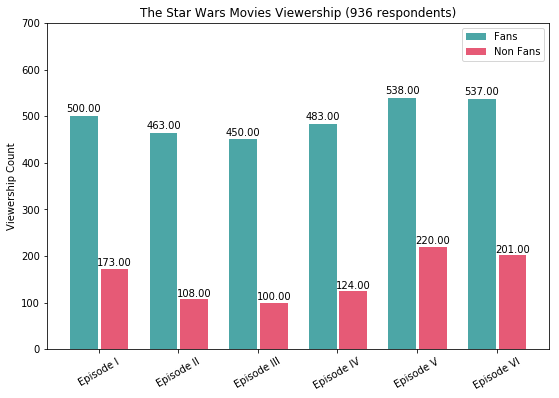

In [589]:
# Repeat the barplot creation with viewership sums
fig,ax = plt.subplots(figsize=(9,6))

# Calculate the sum of the Episode seen columns and create two matplotlib barplots 
fans_seen_bar = ax.bar(ind+width/2 -.01, fans[fans.columns[3:9]].sum(), width, color="teal", alpha=.7, label='Fans')
nonfans_seen_bar = ax.bar(ind+(width+.2), nonfans[nonfans.columns[3:9]].sum(), width, color="crimson", alpha=.7, label='Non Fans')

# Ad labels to the graph and position the xticks for visibility 
ax.set_ylabel('Viewership Count')
ax.set_title('The Star Wars Movies Viewership (936 respondents)')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Episode I', 'Episode II', 'Episode III','Episode IV', 'Episode V', 'Episode VI'), rotation = 30)
ax.set_ylim(0,700)
ax.legend()

autolabel(fans_seen_bar)
autolabel(nonfans_seen_bar)

plt.show()

It looks like the Fans have a very consistent viewership across the board, but have slightly more overall viewerhship of the original series while the non-fans have greater fluctations. The are 381 views for the prequel trilogy, and 545 views for the original trilogy amongst non-fans. This is compared to 1413 and 1558, respectively, amongst fans. The ratios are then .69 and .91 in terms of Prequel/Original trilogy views of nonfans and fans. So while both the fans and non-fans prefer the original trilogy when they rank the movies, paradoxically the fans have seen the prequel movies more frequently. This is likely due to their commitment into the original trilogy and a feeling of being obligated to finish the series. It would be interesting to observe if this behavior continues for the next trilogy of Star Wars. 

# Conclusion

The survey conducted by 538 consistently ranks "Episode V: The Empire Strikes Back" as the best of the bunch amongst the respondents, and was also the most viewed. This holds true across both the fans and nonfans of the series. The fans of Star Wars consistently rank the prequel trilogy lower across the board, but the effect does not hold for the nonfans of the series. Perhaps the nonfans did not have built up years of expectations for the prequels and can thus appreciate them as separate works of art compared to the original trilogy. The lower ranking of Episode IV amongst nonfans might also be due to the movie's lower budget and older age compared to the following Star Wars films. It would be interesting to repeat this analysis for the new Star Wars trilogy and see if the effects hold up. 